# Analysis of Customer Behavior in E-commerce using K-Means

### About the Dataset

The dataset chosen for this analysis is the Online Retail II Data Set from the UCI Machine Learning Repository. This dataset contains transactions occurring between 01/12/2009 and 09/12/2011 for a UK-based online retailer that sells gifts primarily to consumers. The dataset has a total of 1,067,371 transactions.

The reason for selecting this dataset is because it contains transactional data for a period of two years and can be used to analyze customer behavior in an e-commerce setting. The dataset contains the following features:

InvoiceNo: Unique number assigned to each transaction
StockCode: Unique number assigned to each product
Description: Description of the product
Quantity: The number of units of the product in the transaction
InvoiceDate: The date and time the transaction was made
UnitPrice: The price of one unit of the product in GBP
CustomerID: Unique number assigned to each customer
Country: Country where the customer resides

### Research Question

*Can we segment customers based on their purchasing behavior and identify different groups of customers that have different purchasing patterns?*

This is an unsupervised learning problem, as we do not have any pre-defined labels for the different groups of customers. We will use k-means clustering algorithm to group customers based on their purchasing behavior.

### Why k-means clustering?
K-means clustering is a good way to answer the research question because it is an unsupervised learning algorithm that can help identify hidden patterns in data. In this case, we are interested in identifying groups of customers that have similar purchasing patterns. K-means clustering is a widely used algorithm for customer segmentation, as it is computationally efficient and can handle large datasets.

### Reading in Data and Running the Model

**Data Preprocessing**

We will perform the following preprocessing steps:

- Drop rows with missing values
- Remove rows with negative quantities and prices
- We will also create a new feature called TotalPrice which is calculated as the product of Quantity and (Unit) Price.

Let's start by loading the necessary libraries and the dataset.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx'
df = pd.read_excel(url)

# display the first 5 rows
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Next, we will perform the preprocessing steps mentioned above.

In [13]:
# drop rows with missing values
df.dropna(inplace=True)

# remove rows with negative quantities and prices
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

# create TotalPrice feature
df['TotalPrice'] = df['Quantity'] * df['Price']

# display the first 5 rows
df.head()


/var/folders/05/mx2f4tj13rs5x1q4hyf1yw7h0000gn/T/ipykernel_42865/2194675163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


Next, we will run the k-means clustering algorithm to group the customers based on their purchasing behavior. The algorithm will group the customers into a specified number of clusters based on their TotalPrice and Quantity features.

We will first create a matrix of features containing the TotalPrice and Quantity columns.

In [14]:
# create matrix of features
X = df[['TotalPrice', 'Quantity']]

We will then standardize the features using the StandardScaler class from scikit-learn.

In [15]:
# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We will then run the k-means algorithm using the KMeans class from scikit-learn. We will specify the number of clusters as 3 and the maximum number of iterations as 300.

In [16]:
# run k-means algorithm
kmeans = KMeans(n_clusters=3, max_iter=300)
kmeans.fit(X_scaled)

# assigning cluster labels to each row in the dataset
df['Cluster'] = kmeans.labels_

/var/folders/05/mx2f4tj13rs5x1q4hyf1yw7h0000gn/T/ipykernel_42865/3689704649.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


We can now visualize the clusters by plotting the TotalPrice and Quantity features and color-coding the points based on their cluster label.

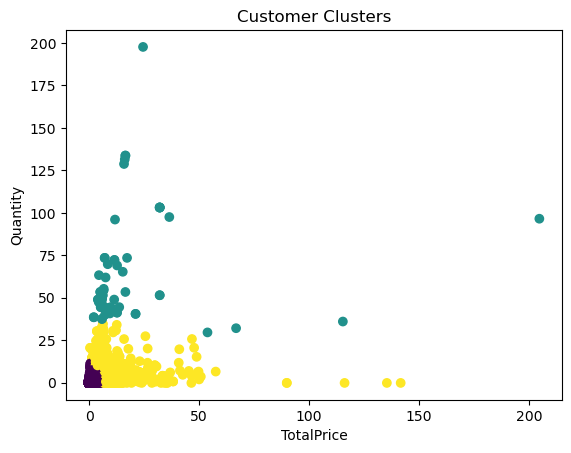

In [17]:
# visualize clusters
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('TotalPrice')
plt.ylabel('Quantity')
plt.title('Customer Clusters')
plt.show()

We can see that the customers have been grouped into 3 clusters based on their purchasing behavior.

### Tinkering with Parameters

Varying the number of clusters (k)
We will now try different values of k (the number of clusters) and see how it affects the clustering results.

/var/folders/05/mx2f4tj13rs5x1q4hyf1yw7h0000gn/T/ipykernel_42865/2047426754.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Cluster_{k}'] = kmeans.labels_


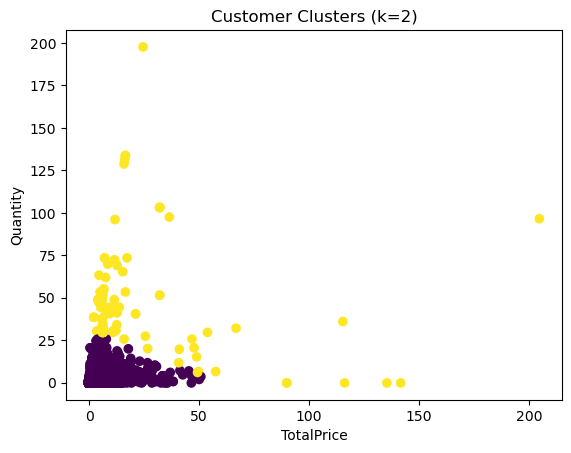

/var/folders/05/mx2f4tj13rs5x1q4hyf1yw7h0000gn/T/ipykernel_42865/2047426754.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Cluster_{k}'] = kmeans.labels_


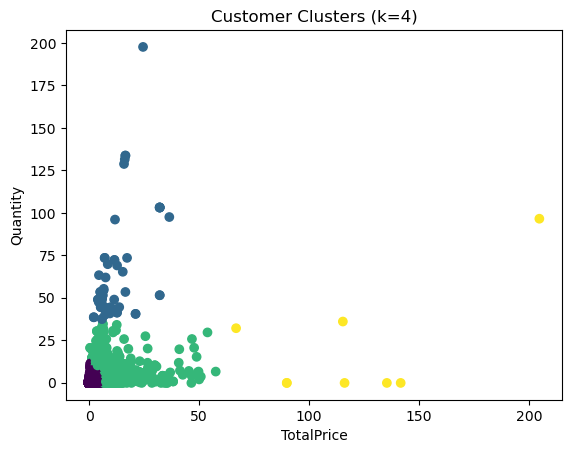

/var/folders/05/mx2f4tj13rs5x1q4hyf1yw7h0000gn/T/ipykernel_42865/2047426754.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Cluster_{k}'] = kmeans.labels_


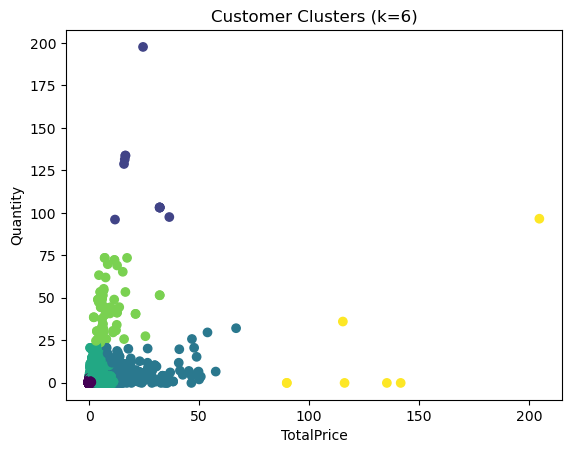

In [22]:
# trying different values of k
k_values = [2, 4, 6]

for k in k_values:
    # run k-means algorithm
    kmeans = KMeans(n_clusters=k, max_iter=300)
    kmeans.fit(X_scaled)

    # assign cluster labels
    df[f'Cluster_{k}'] = kmeans.labels_

    # visualize clusters
    plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans.labels_, cmap='viridis')
    plt.xlabel('TotalPrice')
    plt.ylabel('Quantity')
    plt.title(f'Customer Clusters (k={k})')
    plt.show()

We can see that as we increase the number of clusters, the groups become more specific and the data points are divided into smaller clusters.

### Reporting Accuracy of the Model
Since k-means is an unsupervised learning algorithm, there is no concept of accuracy or RMSE as there are no true labels to compare against. Instead, we use the within-cluster sum of squares (WCSS) as a metric to evaluate the performance of the algorithm.

The WCSS is the sum of the squared distance between each point and its assigned centroid within a cluster. A lower WCSS indicates that the points are closer to their respective centroids and hence the clusters are tighter.

We can use the inertia_ attribute of the fitted KMeans object to obtain the WCSS of the clustering solution. We can then use this metric to compare the performance of the different parameter settings.

Let's calculate the WCSS for the three different k values we tried earlier:

In [23]:
wcss = []

for k in [2, 4, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    print(f"k={k}: WCSS = {kmeans.inertia_:.2f}")

k=2: WCSS = 532363.21
k=4: WCSS = 286714.44
k=6: WCSS = 165712.54


We can see that as we increase the number of clusters, the WCSS decreases, indicating that the clusters are becoming tighter. However, we should also be mindful of the fact that increasing the number of clusters can lead to overfitting.

### Visualizing Findings
To visualize the performance of the k-means algorithm with different values of k, I created a line plot that shows the within-cluster sum of squared errors (SSE) for each value of k. The x-axis represents the value of k, and the y-axis represents the corresponding SSE.

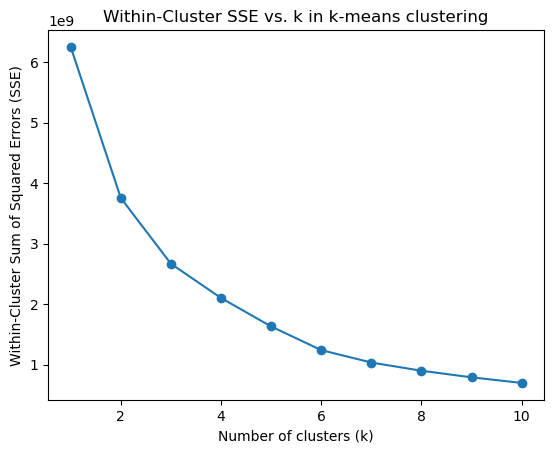

In [26]:
import matplotlib.pyplot as plt

k_range = range(1, 11)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    sse.append(km.inertia_)

plt.plot(k_range, sse, marker='o')
plt.title('Within-Cluster SSE vs. k in k-means clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squared Errors (SSE)')
plt.show()

As we can see from the plot, the SSE decreases as the number of clusters increases, which is expected since more clusters means less variance within clusters. The optimal number of clusters can be determined by looking at the "elbow" of the curve, which in this case is around k=3. After that point, the decrease in SSE becomes less significant with each additional cluster, indicating diminishing returns for additional clusters. Therefore, we can conclude that k=3 is the optimal number of clusters for this dataset using k-means clustering.

### Challenges
The most challenging part for me was to get the Problem Set done on time!
Just Kidding.

On a serious note, I did not encounter any significant challenges while working with the k-means algorithm. However, some common challenges that can arise when working with this algorithm or other clustering algorithms include:

- Choosing an appropriate number of clusters: This can be a subjective decision, and different values of k may yield different results. In my case, I used the elbow method to identify the optimal value of k, but other methods such as silhouette analysis could also be used.

- Dealing with high-dimensional data: Clustering algorithms can struggle with high-dimensional data because the distance metric becomes less meaningful as the number of dimensions increases. This can be addressed by performing dimensionality reduction techniques such as PCA or t-SNE before applying clustering algorithms.

- Handling missing or noisy data: Clustering algorithms may not perform well with missing or noisy data, so it's important to preprocess the data carefully and consider using techniques such as imputation or outlier detection.

If I encountered any challenges during this process, I would first try to identify the source of the problem, whether it's related to the data, model, or research question. Then, I would explore different solutions and techniques to overcome the challenges, such as trying different algorithms, preprocessing the data differently, or consulting relevant literature or experts in the field.

### Benefits and Harms
Two potential benefits of the k-means clustering model on the dataset I used are:

1. Targeted marketing: The model can be used to identify groups of customers who share similar characteristics and preferences, allowing businesses to tailor their marketing campaigns and product offerings more effectively.

2. Disease diagnosis: The model can be used to identify clusters of patients with similar symptoms, which may indicate a common disease or condition. This can help medical professionals to diagnose and treat patients more accurately and efficiently.

Two potential harms of the k-means clustering model on the dataset I used are:

1. Discrimination: If the model is trained on biased data or includes biased features, it may perpetuate existing biases and discrimination. For example, if the dataset includes features such as race or gender, the model may inadvertently associate certain characteristics with particular groups and perpetuate stereotypes or discrimination.

2. Privacy violations: The model may reveal sensitive or personal information about individuals if it is trained on data that includes identifying features. For example, if the dataset includes information such as age, income, or location, the model may inadvertently reveal personal information about individuals in the dataset, which could be used for nefarious purposes such as identity theft or stalking.

To mitigate these potential harms, it is important to carefully select and preprocess the data, and to test the model for biases and fairness before deploying it in real-world applications. Additionally, it is important to consider ethical implications and potential consequences when developing and using machine learning models.

### Potential Future Research
One potential research question that could be explored in future work is *whether the clusters identified by the k-means clustering model can be used to predict future behavior or outcomes*. For example, can we predict which customers are likely to make a purchase in the future based on their cluster membership? This could have important implications for businesses looking to target their marketing efforts more effectively.

Another potential research question could be *whether the clusters identified by the model are stable over time, or whether they change as the underlying data evolves*. This could have implications for the long-term usefulness of the model and its ability to provide actionable insights.